#### 简单线性回归

简单线性回归(单变量univariate)的目标是建立单个特征(explanatory variable, $x$)与联系值目标(response variable, $y$)之间的线性关系。具有一个解释变量的线性模型方程定义如下：

$$y = w_{1}x+ b$$

其中，$w_{1}$ 是权重(weight)，$b$ 是偏置单元(bias unit)。前者为解释变量的权重，后者为y轴截距(intercept)。因此，线性回归可以理解为通过训练样本寻找最佳拟合直线，如下图：



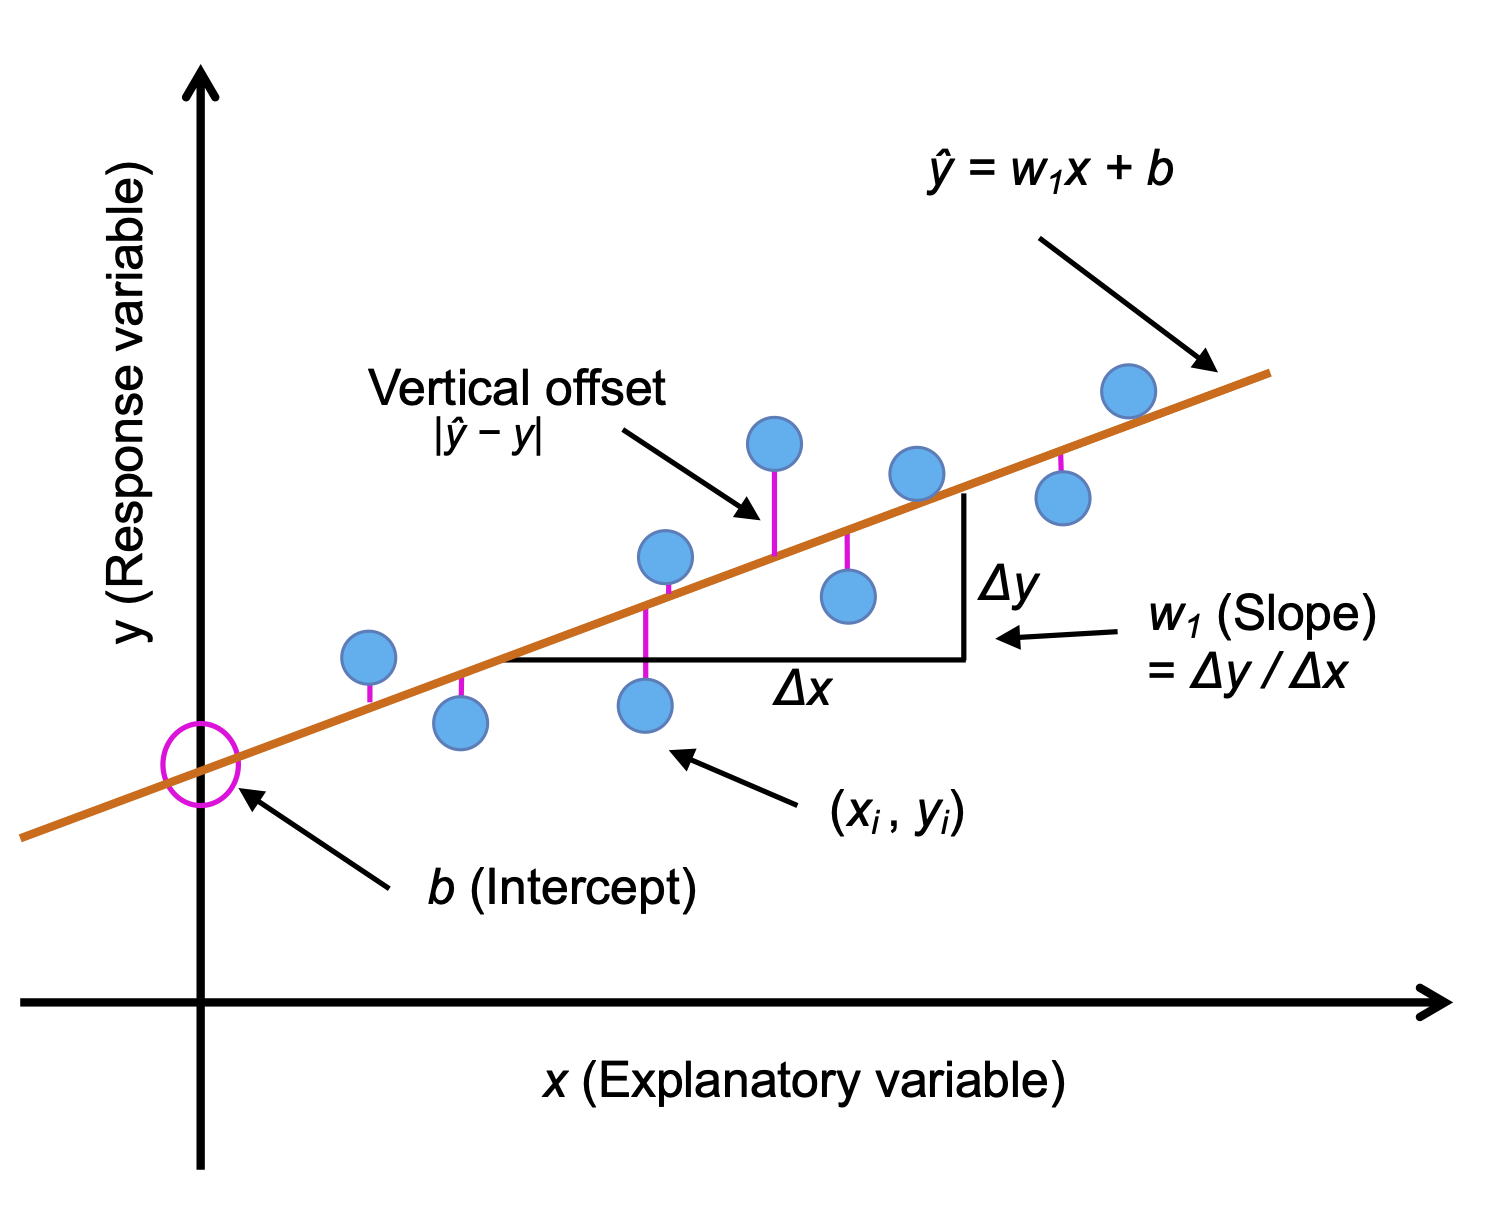

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01.png', 
      width=450)

在上图中，最佳拟合直线也被称为回归线(regression line)， 从回归线到训练样本的垂直线是所谓的偏移量(offsets)或者残差(residuals), 即我们预测结果的误差。

#### 多元线性回归

将单变量推广到多变量的情况，可以得到如下公式：

$$y = w_1x_1 + ... + w_mx_m + b = \sum_{i=1}^mw_ix_i + b = w^T\boldsymbol{x} + b$$

下图展示了具有两个特征的多元线性回归模型具有的二维拟合超平面(fitted hyperplane):

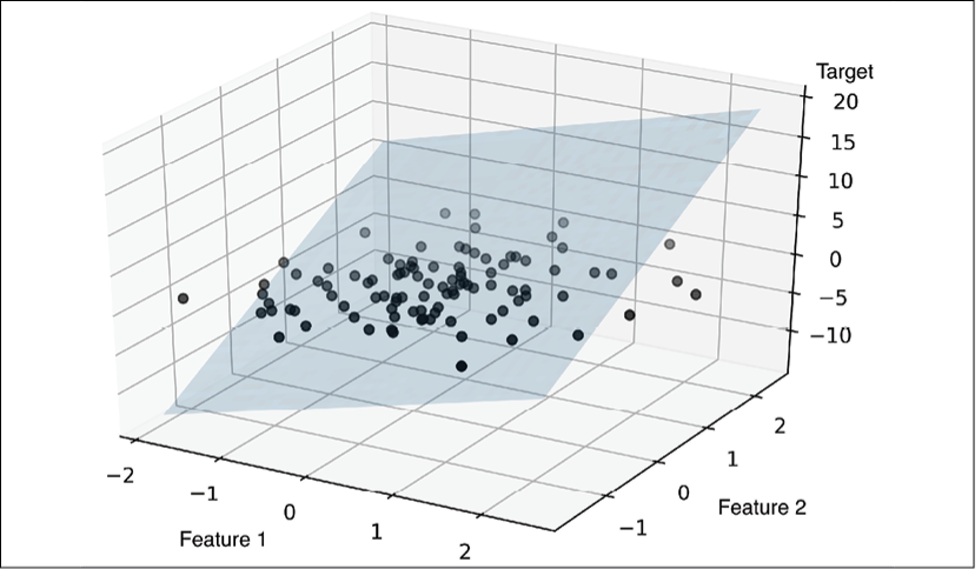

In [2]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01_2.png', 
      width=450)

#### 探索Ames Housing dataset

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

In [3]:
# 数据链接.   https://jse.amstat.org/v19n3/decock/AmesHousing.txt
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
# df.to_csv('../Python-MachineLearning/Datasets/Ames_house/house.csv', index=None)

In [ ]:
df